In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(_img):
    img = _img.copy().astype(np.float)
    r = img[..., 2].copy()
    g = img[..., 1].copy()
    b = img[..., 0].copy()
    img = 0.2126 * r + 0.7152 * g + 0.0722 * b
    img = img.astype(np.uint8)
    return img

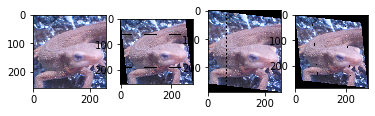

In [14]:
#31
def x_sharing(img, dx=30):
    h, w, c = img.shape
    new_h, new_w = h, w + dx
    out = np.zeros((new_h, new_w, c))
    
    for i in range(h):
        for j in range(w):
            for k in range(c):
                out[i, np.round(j+dx/h*i).astype(np.int)] = img[i, j]

    out = out.astype(np.uint8)
    return out


def y_sharing(img, dy=30):
    h, w, c = img.shape
    new_h, new_w = h + dy, w
    out = np.zeros((new_h, new_w, c))
    
    for i in range(h):
        for j in range(w):
            for k in range(c):
                out[np.round(i+dy/h*j).astype(np.int), j] = img[i, j]

    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori.png')
img = img[..., ::-1]

result1 = x_sharing(img)
result2 = y_sharing(img)
result3 = x_sharing(y_sharing(img))

plt.subplot(1, 4, 1)
plt.imshow(img)
plt.subplot(1, 4, 2)
plt.imshow(result1)
plt.subplot(1, 4, 3)
plt.imshow(result2)
plt.subplot(1, 4, 4)
plt.imshow(result3)
plt.show()

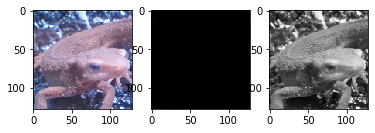

In [3]:
#32
def dft(_img):
    img = rgb2gray(_img).astype(np.float)
    h, w = img.shape
    out = np.zeros((h, w), dtype=np.complex)

    x = np.tile(np.arange(w), (h, 1))
    y = np.arange(h).repeat(w).reshape(h,w)
        
    for p in range(h):
        for q in range(w):
            out[p, q] = np.sum(img * np.exp(-2j * np.pi * (q * x / w + p * y / h))) / np.sqrt(h * w)

    return out


def idft(img):
    h, w = img.shape
    out = np.zeros((h, w), dtype=np.float)
    x = np.tile(np.arange(w), (h, 1))
    y = np.arange(h).repeat(w).reshape(h, w)
    
    for p in range(h):
        for q in range(w):
            out[p, q] = np.abs(np.sum(img * np.exp(2j * np.pi * (x * q / w + y * p / h)))) / np.sqrt(h * w)
            
#     out = out / np.max(out) * 255
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori_128.png')
img = img[..., ::-1]

result = dft(img)
ps = np.abs(result) / np.max(np.abs(result)) * 255
ps = ps.astype(np.uint8)

result2 = idft(result)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(ps, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(result2, cmap='gray')
plt.show()

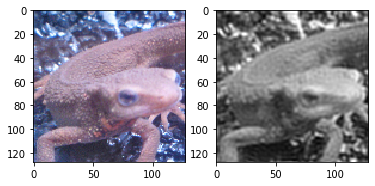

In [7]:
#33
def lowpass(g):
    tmp = g.copy()
    h, w = g.shape
    
    tmp[0:h//2, 0:w//2] = g[h//2:h, w//2:w]
    tmp[0:h//2, w//2:w] = g[h//2:h, 0:w//2]
    tmp[h//2:h, 0:w//2] = g[0:h//2, w//2:w]
    tmp[h//2:h, w//2:w] = g[0:h//2, 0:w//2]
    
    k = np.zeros((h, w))
    r = h // 2
    for i in range(h):
        for j in range(w):
            if ((i-r)**2+(j-r)**2 <= (0.5*r)**2):
                k[i, j] = 1
    
    tmp = tmp * k
    
    g[0:h//2, 0:w//2] = tmp[h//2:h, w//2:w]
    g[0:h//2, w//2:w] = tmp[h//2:h, 0:w//2]
    g[h//2:h, 0:w//2] = tmp[0:h//2, w//2:w]
    g[h//2:h, w//2:w] = tmp[0:h//2, 0:w//2]
    
    return g


img = cv2.imread('imori_128.png')
img = img[..., ::-1]

g = dft(img)

_g = lowpass(g)

result = idft(_g)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

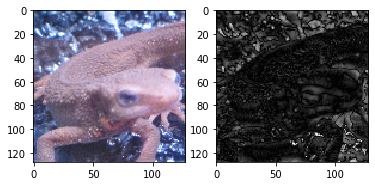

In [8]:
#34
def highpass(g):
    tmp = g.copy()
    h, w = g.shape
    
    tmp[0:h//2, 0:w//2] = g[h//2:h, w//2:w]
    tmp[0:h//2, w//2:w] = g[h//2:h, 0:w//2]
    tmp[h//2:h, 0:w//2] = g[0:h//2, w//2:w]
    tmp[h//2:h, w//2:w] = g[0:h//2, 0:w//2]
    
    k = np.zeros((h, w))
    r = h // 2
    for i in range(h):
        for j in range(w):
            if ((i-r)**2+(j-r)**2 > (0.1*r)**2):
                k[i, j] = 1
    
    tmp = tmp * k
    
    g[0:h//2, 0:w//2] = tmp[h//2:h, w//2:w]
    g[0:h//2, w//2:w] = tmp[h//2:h, 0:w//2]
    g[h//2:h, 0:w//2] = tmp[0:h//2, w//2:w]
    g[h//2:h, w//2:w] = tmp[0:h//2, 0:w//2]
    
    return g


img = cv2.imread('imori_128.png')
img = img[..., ::-1]

g = dft(img)

_g = highpass(g)

result = idft(_g)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

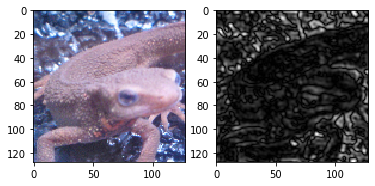

In [4]:
#35
def bandpass(g):
    tmp = g.copy()
    h, w = g.shape
    
    tmp[0:h//2, 0:w//2] = g[h//2:h, w//2:w]
    tmp[0:h//2, w//2:w] = g[h//2:h, 0:w//2]
    tmp[h//2:h, 0:w//2] = g[0:h//2, w//2:w]
    tmp[h//2:h, w//2:w] = g[0:h//2, 0:w//2]
    
    k = np.zeros((h, w))
    r = h // 2
    for i in range(h):
        for j in range(w):
            if ((0.1*r)**2 <= (i-r)**2+(j-r)**2 <= (0.5*r)**2):
                k[i, j] = 1
    
    tmp = tmp * k
    
    g[0:h//2, 0:w//2] = tmp[h//2:h, w//2:w]
    g[0:h//2, w//2:w] = tmp[h//2:h, 0:w//2]
    g[h//2:h, 0:w//2] = tmp[0:h//2, w//2:w]
    g[h//2:h, w//2:w] = tmp[0:h//2, 0:w//2]
    
    return g


img = cv2.imread('imori_128.png')
img = img[..., ::-1]

g = dft(img)

_g = bandpass(g)

result = idft(_g)

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

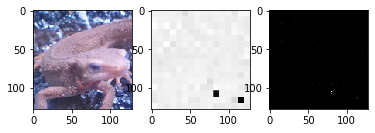

In [45]:
#36 ???????????????????
def dct(_img, t=8):
    img = _img.astype(np.float)
    out = img.copy()
    h, w = img.shape
    
    x = np.tile(np.arange(t), (t, 1))
    y = np.arange(t).repeat(t).reshape(t, t)
    
    c_uv = np.ones((t, t))
    c_uv[0:t, 0] = c_uv[0 ,0:t] = 1 / np.sqrt(2)
    c_uv[0, 0] = 1 / 2

    b = h // t
    for p in range(b):
        for q in range(b):
            for u in range(t):
                for v in range(t):
                    out[p*t:p*t+t, q*t:q*t+t] = 2 / t * c_uv * np.sum(img[p*t:p*t+t, q*t:q*t+t] * np.cos((2 * x + 1) * v * np.pi / 2 / t) * np.cos((2 * y + 1) * u * np.pi / 2 / t))
                    
    return out

def idct(img, t=8, k=8):
    out = img.copy()
    h, w = img.shape
    
    u = np.tile(np.arange(t), (t, 1))
    v = np.arange(t).repeat(t).reshape(t, t)
    
    c_uv = np.zeros((t, t))
    c_uv[0:k, 0:k] = 1
    c_uv[0:k, 0] = c_uv[0 ,0:k] = 1 / np.sqrt(2)
    c_uv[0, 0] = 1 / 2
    
    b = h // t
    for p in range(b):
        for q in range(b):
            for i in range(t):
                for j in range(t):
                    out[p*t+i, q*t+j] = 2 / t * np.sum(c_uv * img[p*t:p*t+t, q*t:q*t+t] * np.cos((2 * j + 1) * u * np.pi / 2 / t) * np.cos((2 * i + 1) * v * np.pi / 2 / t))
    
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out


img = cv2.imread('imori.jpg')
img = img[..., ::-1]

gray = rgb2gray(img)

result1 = dct(gray)

result2 = idct(result1)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result1, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(result2, cmap='gray')
plt.show()

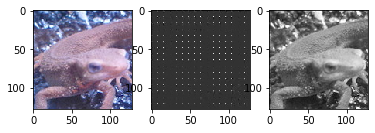

In [58]:
#36
def w(x, y, u, v):
    cu = 1.
    cv = 1.
    if u == 0:
        cu /= np.sqrt(2)
    if v == 0:
        cv /= np.sqrt(2)
    theta = np.pi / (2 * T)
    return (( 2 * cu * cv / T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))

def dct(_img, T=8):
    img = _img.astype(np.float)
    H, W = img.shape
    F = np.zeros((H, W), dtype=np.float32)

    for yi in range(0, H, T):
        for xi in range(0, W, T):
            for v in range(T):
                for u in range(T):
                    for y in range(T):
                        for x in range(T):
                            F[v+yi, u+xi] += img[y+yi, x+xi] * w(x,y,u,v)

    return F

def idct(F, T=8, K=8):
    H, W = F.shape
    out = np.zeros((H, W), dtype=np.float32)

    for yi in range(0, H, T):
        for xi in range(0, W, T):
            for y in range(T):
                for x in range(T):
                    for v in range(K):
                        for u in range(K):
                            out[y+yi, x+xi] += F[v+yi, u+xi] * w(x,y,u,v)

    out = np.clip(out, 0, 255)
    out = np.round(out).astype(np.uint8)

    return out


img = cv2.imread('imori.jpg')
img = img[..., ::-1]

gray = rgb2gray(img)

result1 = dct(gray)

result2 = idct(result1)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(result1, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(result2, cmap='gray')
plt.show()

PSNR = 40.53878371228362
bitrate = 2.0


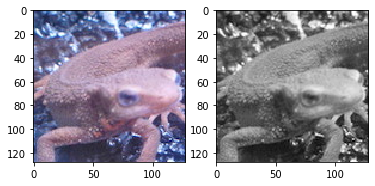

In [74]:
#37
def mse(img1, img2):
    h, w = img1.shape
    return np.sum((img1 - img2)**2) / h / w
    
def psnr(img1, img2):
    vmax = np.max([np.max(img1), np.max(img2)])
    return 10 * np.log10(vmax**2 / mse(img1, img2))

img = cv2.imread('imori.jpg')
img = img[..., ::-1]
gray = rgb2gray(img)
F = dct(gray)
result = idct(F, K=7)

print('PSNR = ' + str(psnr(gray, result)))
print('bitrate = ' + str(8 * 4**2 / 8**2))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

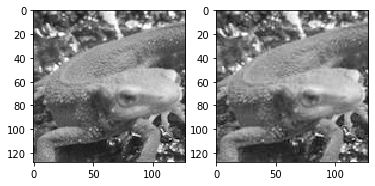

In [77]:
#37
def quantization(F, T=8):
    h, w = F.shape
    
    Q = np.array(((16, 11, 10, 16, 24, 40, 51, 61),
              (12, 12, 14, 19, 26, 58, 60, 55),
              (14, 13, 16, 24, 40, 57, 69, 56),
              (14, 17, 22, 29, 51, 87, 80, 62),
              (18, 22, 37, 56, 68, 109, 103, 77),
              (24, 35, 55, 64, 81, 104, 113, 92),
              (49, 64, 78, 87, 103, 121, 120, 101),
              (72, 92, 95, 98, 112, 100, 103, 99)), dtype=np.float32)
    
    for p in range(0, h, T):
        for q in range(0, w, T):
            F[p:p+T, q:q+T] = np.round(F[p:p+T, q:q+T] / Q) * Q
            
    return F


img = cv2.imread('imori.jpg')
img = img[..., ::-1]

gray = rgb2gray(img)
F = dct(gray)
F = quantization(F)
result = idct(F)

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.show()

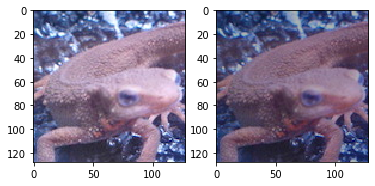

In [83]:
def RGB2YCbCr(_img):
    img = _img.astype(np.float)
    h, w, _ = img.shape
    
    out = np.zeros((h, w, 3))
    out[..., 0] = 0.299 * img[..., 0] + 0.5870 * img[..., 1] + 0.114 * img[..., 2]
    out[..., 1] = -0.1687 * img[..., 0] - 0.3313 * img[..., 1] + 0.5 * img[..., 2] + 128
    out[..., 2] = 0.5 * img[..., 0] - 0.4187 * img[..., 1] - 0.0813 * img[..., 2] + 128
    
    return out

def YCbCr2RGB(img):
    h, w, _ = img.shape
    
    out = np.zeros((h, w, 3))
    out[..., 0] = img[..., 0] + (img[..., 2] - 128) * 1.402
    out[..., 1] = img[..., 0] - (img[..., 1] - 128) * 0.3441 - (img[..., 2] - 128) * 0.7139
    out[..., 2] = img[..., 0] + (img[..., 1] - 128) * 1.7718
    
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    return out
    
    
img = cv2.imread('imori.jpg')
img = img[..., ::-1]

out = RGB2YCbCr(img)
out[..., 0] = out[..., 0] * 0.7
result = YCbCr2RGB(out)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

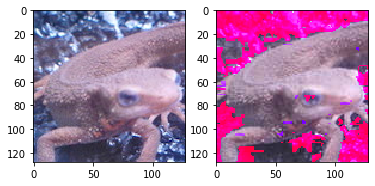

True

In [92]:
#40
def w(x, y, u, v):
    cu = 1.
    cv = 1.
    if u == 0:
        cu /= np.sqrt(2)
    if v == 0:
        cv /= np.sqrt(2)
    theta = np.pi / (2 * T)
    return (( 2 * cu * cv / T) * np.cos((2*x+1)*u*theta) * np.cos((2*y+1)*v*theta))

def dct(_img, T=8):
    img = _img.astype(np.float)
    H, W, C = img.shape
    F = np.zeros((H, W, C), dtype=np.float32)

    for c in range(C):
        for yi in range(0, H, T):
            for xi in range(0, W, T):
                for v in range(T):
                    for u in range(T):
                        for y in range(T):
                            for x in range(T):
                                F[v+yi, u+xi, c] += img[y+yi, x+xi, c] * w(x,y,u,v)

    return F

def idct(F, T=8, K=8):
    H, W, C = F.shape
    out = np.zeros((H, W, C), dtype=np.float32)
    
    for c in range(C):
        for yi in range(0, H, T):
            for xi in range(0, W, T):
                for y in range(T):
                    for x in range(T):
                        for v in range(K):
                            for u in range(K):
                                out[y+yi, x+xi, c] += F[v+yi, u+xi, c] * w(x,y,u,v)

    out = np.clip(out, 0, 255)
    out = np.round(out).astype(np.uint8)

    return out

def quantization(F, T=8):
    h, w, _ = F.shape
    
    Q1 = np.array(((16, 11, 10, 16, 24, 40, 51, 61),
               (12, 12, 14, 19, 26, 58, 60, 55),
               (14, 13, 16, 24, 40, 57, 69, 56),
               (14, 17, 22, 29, 51, 87, 80, 62),
               (18, 22, 37, 56, 68, 109, 103, 77),
               (24, 35, 55, 64, 81, 104, 113, 92),
               (49, 64, 78, 87, 103, 121, 120, 101),
               (72, 92, 95, 98, 112, 100, 103, 99)), dtype=np.float32)

    Q2 = np.array(((17, 18, 24, 47, 99, 99, 99, 99),
               (18, 21, 26, 66, 99, 99, 99, 99),
               (24, 26, 56, 99, 99, 99, 99, 99),
               (47, 66, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99),
               (99, 99, 99, 99, 99, 99, 99, 99)), dtype=np.float32)
    
    for p in range(0, h, T):
        for q in range(0, w, T):
            F[p:p+T, q:q+T, 0] = np.round(F[p:p+T, q:q+T, 0] / Q1) * Q1
            
    for p in range(0, h, T):
        for q in range(0, w, T):
            for c in range(1, 3):
                F[p:p+T, q:q+T, c] = np.round(F[p:p+T, q:q+T, c] / Q2) * Q2
            
    return F


img = cv2.imread('imori.jpg')
img = img[..., ::-1]

Y = RGB2YCbCr(img)
F = dct(Y)
F = quantization(F)
Y = idct(F)
result = YCbCr2RGB(Y)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()
cv2.imwrite('jpeg.jpg', result)